# DSCI 571 - Supervised Learning I

# Lab 4: Naive Bayes and Logistic Regression

## Table of Contents

- [Submission guidelines](#sg)
- [Introduction](#in)
- [Exercise 1 - Naive Bayes by hand](#1)
- [Exercise 2 - Sentiment analysis on the IMDB dataset](#2)
- [Exercise 3 - Model building and hyperparameter optimization](#3)
- [Exercise 4 - Model interpretation](#4)
- [Exercise 5 - Test results and final evaluation](#5)
- [Exercise 6 - Summary and wrap up](#6)

In [ ]:
# Import libraries
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Autograding
import tests_lab4
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# train test split and cross validation
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:2}

You will receive marks for correctly submitting this assignment. 

To correctly submit this assignment follow the instructions below:

- Push your assignment to your GitHub repository. 
- Add a link to your GitHub repository here: LINK TO YOUR GITHUB REPO 
- Upload an HTML render of your assignment to Canvas. The last cell of this notebook will help you do that.
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

[Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

**NOTE: The data you download for use in this lab SHOULD NOT BE PUSHED TO YOUR REPOSITORY. You might be penalised for pushing datasets to your repository. I have seeded the repository with `.gitignore` and hoping that it won't let you push CSVs.**

## Introduction <a name="in"></a>
<hr>

In this lab, we will explore two probabilistic classifiers: Naive Bayes and Logistic Regression using a text classification task called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis), which is a problem of assigning positive or negative labels to a given text based on the sentiment or attitude expressed in it. [Here](https://www.youtube.com/watch?v=uXu2uEubV9Q&list=PLoROMvodv4rOFZnDyrlW3-nI7tMLtmiJZ&index=33) is a short video explaining the task of sentiment analysis. 

Note that we are going to use a dataset which is larger (~50,000 examples) compared to the datasets we have worked with so far. So running most of the exercises is going to take a bit longer. If your computer is having trouble with the size of the data or in the initial phases when you are trying out things, here are a few things to try. 
- Try reducing the number of folds in cross-validation. 
- Try using `njob=-1` or `njob=-2` to use multiple cores of your processor, if you have them. 
- Try reducing the range of hyperparameters to explore. 
- Under sample the data (e.g., using the `sample` method of pandas dataframes) and write a note for the TAs explaining why you are doing it. 


## Exercise 1: Naive Bayes by hand <a name="1"></a>
<hr>

Naive Bayes is popular in text classification tasks. In the lecture we applied naive Bayes for spam classification. In the next few exercises you'll apply it to another text classification task called [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). 

Consider the toy data below, which has $10$ training examples, $4$ binary features indicating presence or absence of the word, and the sentiment associated with each example.  Given this information, you want to predict the target (positive or negative sentiment) for the following test example: 
    
$$\hat{x} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$

In the exercises below, we'll do this step by step. 

In [ ]:
### BEGIN STARTER CODE 

sentiment_toy_data = {
    "predictable": [1, 1, 1, 0, 0, 1, 1, 0, 0, 1],
    "fun": [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
    "pathetic": [0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
    "satire": [0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
    "target": [
        "negative",
        "positive",
        "negative",
        "positive",
        "positive",
        "negative",
        "positive",
        "negative",
        "negative",
        "negative",
    ],
}

toy_df = pd.DataFrame(sentiment_toy_data)
toy_df

### END STARTER CODE 

### 1.1 Class prior probabilities
rubric={autograde:2}

**Your tasks:**

Compute the estimates of the class prior probabilities. (You don't need to show any work.)
1. Compute $p(\text{positive})$ and store it in a variable called `pos_prior`.
2. Compute $p(\text{negative})$ and store it in a variable called `neg_prior`.

In [ ]:
pos_prior = None
neg_prior = None

### YOUR ANSWER HERE

In [ ]:
assert tests_lab4.ex1_1_1(
    pos_prior
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_1_2(
    neg_prior
), "Your answer is incorrect, see traceback above."
print("Success")

### 1.2 Conditional probabilities
rubric={autograde:8}

**Your tasks:**

Compute the following estimates of the conditional probabilities required by naive Bayes for $\hat{x}$ below. 
$$\hat{x} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$

Store the values of conditional probabilities in the variables below. Each variable represents the probability of presence of the word given the class. For instance, `fun1_pos` represents $p(\text{fun} = 1  \mid \text{positive})$ You do not need to show any work and do not need to consider Laplace smoothing here, just compute the raw frequencies/proportions and store them in the respective variables.



In [ ]:
predictable1_pos = None # P(predictable = 1 | positive)
predictable1_neg = None # P(predictable = 1 | negative)
fun1_pos = None # P(fun = 1 | positive)
fun1_neg = None # P(fun = 1 | negative)
pathetic0_pos = None # P(pathetic = 0 | positive)
pathetic0_neg = None # P(pathetic = 0 | negative)
satire1_pos = None # P(satire = 1 | positive)
satire1_neg = None # P(satire = 1 | negative)

### YOUR ANSWER HERE

In [ ]:
assert tests_lab4.ex1_2_1(
    predictable1_pos
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_2(
    predictable1_neg
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_3(
    fun1_pos
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_4(
    fun1_neg
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_5(
    pathetic0_pos
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_6(
    pathetic0_neg
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_7(
    satire1_pos
), "Your answer is incorrect, see traceback above."
print("Success")

In [ ]:
assert tests_lab4.ex1_2_8(
    satire1_neg
), "Your answer is incorrect, see traceback above."
print("Success")



### YOUR ANSWER HERE

### 1.3 Prediction
rubric={reasoning:5}

Under the naive Bayes model and your estimates of the above probabilities, what is the most likely label for the following test example? "positive" or "negative"? Show your working. Use formatting of your own choice (e.g., latex preferable). 

$$\hat{x} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$

### YOUR SOLUTION HERE

$$p(\text{positive} \mid predictable = 1, fun = 1, pathetic = 0, satire = 1) = ?$$

$$p(\text{negative} \mid predictable = 1, fun = 1, pathetic = 0, satire = 1) = ?$$


### YOUR ANSWER HERE

### (optional) 1.4 Smoothing
rubric={reasoning:1}

**Your tasks:**

1. Suppose you are asked to predict sentiment of the following example. What would happen when you try to calculate $P(positive \mid \hat{x_1})$? How would you solve this problem?
$$\hat{x_1} = \begin{bmatrix}0 & 1 & 1 & 1\end{bmatrix}$$

### YOUR ANSWER HERE

### 1.5 `BernoulliNB` on the toy data 
rubric={reasoning:2}

Let's try [`sklearn`'s `BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) on our toy data. 

**Your tasks:**

1. Train `BernoulliNB` on `X_train` and `y_train` from the starter code below. (Note that we are using `BernoulliNB` because our features are binary. You are already given extracted features here but if you were only given text, you could use `CountVectorizer` with `binary = False` argument to extract binary features.)
2. Predict on `X_test`. 

In [ ]:
### BEGIN STARTER CODE

X_train = toy_df.drop(columns=["target"])
y_train = toy_df["target"]
X_test = [[1, 1, 0, 1]]

### END STARTER CODE

In [ ]:
### YOUR ANSWER HERE

### 1.6 Probability estimates of naive Bayes
rubric={accuracy:1,reasoning:2}

**Your tasks:**

1. Does your prediction for the following example from 1.3 match with the prediction given by `scikit-learn` in 1.5? 
$$\hat{x} = \begin{bmatrix}1 & 1 & 0 & 1\end{bmatrix}$$ 
2. Examine the probability estimates for example `[1, 1, 0, 1]` from 1.5 using `predict_proba`. Do they match with the estimates you calculated in 1.3? Why or why not? 

### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

### YOUR ANSWER HERE

## Exercise 2: Sentiment analysis on the IMDB dataset <a name="2"></a>
<hr>

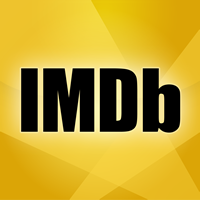

In this exercise, you will carry out sentiment analysis on a real corpus, [the IMDB movie review dataset](https://www.kaggle.com/utathya/imdb-review-dataset). 

Download the CSV using the above link. Unzip it and move it to the local version of your lab repository. You will not be able to commit the CSV to your repository because it's seeded with `.gitignore`. The starter code below loads the data CSV file (assuming that it's in the current directory) as a pandas DataFrame called `imdb_df`. There are three possible labels in the dataset: `pos`, `neg`, and `unsup`. For now, we are discarding rows with the `unsup` label from the dataframe. The dataset comes with `train` and `test` sets which contain disjoint set of movies, so no significant performance could be obtained by memorizing movie-unique terms  associated with observed labels. We'll use the given train-test splits. 



In [ ]:
### BEGIN STARTED CODE

imdb_df = pd.read_csv("imdb_master.csv", encoding="ISO-8859-1", index_col="Unnamed: 0")
imdb_df = imdb_df.query('label == "neg" | label == "pos"')
train_df = imdb_df.query('type == "train"')
test_df = imdb_df.query('type == "test"')

### END STARTER CODE

### 2.1 Separate features and target
rubric={accuracy:1}

**Your task:**

Create `X_train`, `X_test`, `y_train`, `y_test`. 

In [ ]:
### YOUR ANSWER HERE

### (optional) 2.2 EDA
rubric={reasoning:1}

- Use [pandas profiling](https://github.com/pandas-profiling/pandas-profiling) to explore the length information of positive reviews vs. negative reviews. 
- Note your observations. 

In [ ]:
### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

### YOUR ANSWER HERE

## Exercise 3: Model building and hyperparameter optimization <a name="3"></a>
<hr>

In this exercise, we will try a number of models on our dataset and carry out hyperparameter optimization for the logistic regression model. You may use or adapt the function below from lab 2 to keep your results organized. 

In [ ]:
### BEGIN STARTER CODE

# You may use or adapt this function to keep your results organized
def store_cross_val_results(model_name, scores, results_dict):
    """
    Stores mean scores from cross_validate in results_dict for
    the given model model_name.

    Parameters
    ----------
    model_name :
        scikit-learn classification model
    scores : dict
        object return by `cross_validate`
    results_dict: dict
        dictionary to store results

    Returns
    ----------
        None

    """
    results_dict[model_name] = {
        "mean_train_accuracy": "{:0.4f}".format(np.mean(scores["train_score"])),
        "mean_valid_accuracy": "{:0.4f}".format(np.mean(scores["test_score"])),
        "mean_fit_time (s)": "{:0.4f}".format(np.mean(scores["fit_time"])),
        "mean_score_time (s)": "{:0.4f}".format(np.mean(scores["score_time"])),
        "std_train_score": "{:0.4f}".format(scores["train_score"].std()),
        "std_valid_score": "{:0.4f}".format(scores["test_score"].std()),
    }

### END STARTER CODE

### 3.1 DummyClassifier 
rubric={accuracy:2}

**Your tasks:**
1. Report mean cross-validation scores for `DummyClassifier`. 

You may use the `store_cross_val_results` function provided above and `results_dict` below to keep track of different results. 

In [ ]:
results_dict = {}

In [ ]:
### YOUR ANSWER HERE

### 3.2 Different classifiers 
rubric={accuracy:3,reasoning:3}

1. For each model in the starter code below, build a pipeline with two steps: `CountVectorizer` and the model with the provided hyperparameters, carry out cross validation using the pipeline, and show mean cross-validation results for each model. You may use `store_cross_val_results` function to store the results. Note: the code might be a bit slow here. You can reduce the number of folds (e.g., cv=2) to speed it up, if necessary.
2. Discuss the results. You may consider the following questions for discussion:
    - Which models are performing well on this task? 
    - Among the best performing models, which ones are trained faster than others? 
    - Which ones seem to suffer from overfitting? 

In [ ]:
### BEGIN STARTER CODE

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "RBF SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
}

### END STARTER CODE

In [ ]:
### YOUR ANSWER HERE

### 3.3 Hyperparameter optimization 
rubric={accuracy:2,reasoning:2}

**Your tasks:**

1. Define a pipeline with `CountVectorizer` and `LogisitcRegression` with `max_iter=1000`.
2. Using `RandomizedSearchCV`, jointly optimize `C` and `max_features` of logistic regression. Use your choice of range for hyperparameter values.
3. What are the best score and best hyperparameter values according to your random search? Are you getting better mean validation score than logistic regression pipeline with default hyperparameters from 3.2? 

In [ ]:
### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

### YOUR ANSWER HERE

## Exercise 4: Model interpretation <a name="4"></a>
<hr>

One of the primary advantage of linear models is their ability to interpret models in terms of important features. In this exercise, we'll explore the weights learned by logistic regression classifier. 

### 4.1 Get most informative words
rubric={accuracy:6}

**Your tasks**

Use the best estimator from 3.3 to find the 20 words that are most indicative of a positive review and the 20 words that are most indicative of a negative review. 
- The information you need is exposed by the `coef_` attribute of [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) object. 
- The vocabulary (mapping from feature indices to actual words) can be obtained by calling `get_feature_names()` on the `CountVectorizer` object. 

You may refer to the code from lecture notes and provide simple attribution here such as "code adapted from lecture **". 


In [ ]:
### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

### 4.2 Interpretation
rubric={reasoning:4}

**Your tasks**

1. Do the words associated with positive and negative reviews make sense? 
2. Why is it useful to get access to this information? 
3. Would it be hard to get most informative features using other classifiers such as SVMs with RBF kernel, naive Bayes, or decision trees? Why or why not? 

### YOUR ANSWER HERE

## 5. Test score and final evaluation <a name="5"></a>
<hr>

Let's examine the performance of our best model on the test set. 

### 5.1 Evaluation on test data
rubric={accuracy:2,reasoning:2}

**Your tasks:**
1. `fit` the model with best hyperparameters you found in previous exercises on `X_train` and `y_train`.  
2. Evaluate this model on the test set. 
3. How does your test accuracy compare to your validation accuracy? To what extent do you trust the test scores? 

In [ ]:
### YOUR ANSWER HERE

### YOUR ANSWER HERE

### 5.2 Evaluation using probability scores
rubric={accuracy:4}

**Your tasks:**

Using this model, find the movie reviews in the test set with 
- the highest predicted probability of being positive (i.e., where the model is most confident that the review is positive)
- the highest predicted probability of being negative (i.e., where the model is most confident that the review is negative)

In each case, print out the review and the associated probability score. 

In [ ]:
### YOUR ANSWER HERE

In [ ]:
### YOUR ANSWER HERE

### (optional) 5.3
rubric={reasoning:1}

Test the best model on some fake movie reviews. Some examples are given below. Feel free to add to this list. Briefly discuss your results - how does your model do? In what instances does it do poorly? Why that might be the case?

In [ ]:
### BEGIN STARTER CODE

# Feel free to modify the starter code as you see appropriate.
fake_reviews = [
    "This movie was excellent! The performances were oscar-worthy!",
    "Unbelievably disappointing.",
    "Full of zany characters and richly applied satire, and some great plot twists",
    "This is the greatest screwball comedy ever filmed",
    "It was pathetic. The worst part about it was the boxing scenes.",
    """It could have been a great movie. It could have been excellent, 
                and to all the people who have forgotten about the older, 
                greater movies before it, will think that as well. 
                It does have beautiful scenery, some of the best since Lord of the Rings. 
                The acting is well done, and I really liked the son of the leader of the Samurai.
                He was a likeable chap, and I hated to see him die...
                But, other than all that, this movie is nothing more than hidden rip-offs.
                """,
]
true_labels = ["pos", "neg", "pos", "pos", "neg", "neg"]

### END STARTER CODE

In [ ]:
### YOUR ANSWER HERE

### YOUR ANSWER HERE

### (optional) 5.4
rubric={reasoning:1}

**Your tasks:**

1. Examine the test examples from the test set where our best model is making mistakes, i.e., where the true labels do not match the predicted labels. 
2. How could you further improve the accuracy? 

In [ ]:
### YOUR ANSWER HERE

## Exercise 6: Summary and wrap up <a name="6"></a>
<hr>

### Exercise 6.1: Qualitative comparison of classifiers 
rubric={reasoning:12}

Fill in the following table with at least one entry per box.

Classifier |      Strengths | Weaknesses | Key hyperparameters |
-----------|      ------------|------------|---------------------|
decision tree       |            |            |                     |
$k$-NN              |            |            |                     |
SVM                 |            |            |                     |
naive Bayes         |            |            |                     |
logistic regression                 |            |            |                     |

For strengths and weaknesses, some things to consider are:
  * concerns about underfitting
  * concerns about overfitting
  * speed
  * scalability for large data sets  
  * ease of use for multi-class classification  
  * effectiveness when number of examples $\ll$ number of features
  * effectiveness when number of examples $\gg$ number of features
  * ability to represent uncertainty
  * time/space complexity 
  * etc.

### YOUR ANSWER HERE

### (optional) Exercise 6.2
rubric={reasoning:1}

Machine learning has its own workflows and good habits, such as when to split data, writing your code as clear pipelines, and tuning your models in a reproducible manner, to ensure the validity of your results. In this course, we not only learned a number of machine learning methods but also some good habits as a machine learning practitioner. In this optional exercise, I would like you to review a couple of Kaggle notebooks of your choice for some of the most popular datasets we have explored in this class and examine their methodology. In particular, examine the following questions and write your observations. 

- Are they splitting the data before EDA?
- Are they carrying out cross-validation? 
- Is their code reproducible?
- Do you trust their results? Why or why not? 

### (optional) Exercise 6.3
rubric={reasoning:1}

**Your tasks:**

What is your biggest takeaway from this course? 

Note that their is no correct answer here but we would appreciate thoughtful answers. 

### Submission to Canvas

**PLEASE READ: When you are ready to submit your assignment do the following:**

- Run all cells in your notebook to make sure there are no errors by doing Kernel -->  Restart Kernel and Run All Cells...
- If you are using the "571" `conda` environment, make sure to select it before running all cells. 
- Convert your notebook to .html format using the `convert_notebook()` function below or by File -> Export Notebook As... -> Export Notebook to HTML
- Run the code `submit()` below to go through an interactive submission process to Canvas.
After submission, be sure to do a final push of all your work to GitHub (including the rendered html file).

In [ ]:
# from canvasutils.submit import convert_notebook, submit

# convert_notebook("lab1.ipynb", "html")  # uncomment and run when you want to try convert your notebook (or you can convert manually from the File menu)
# submit(course_code=53670, token=False)  # uncomment and run when ready to submit to Canvas

### Congratulations on finishing all labs! :clap: :clap: 